# Document Loading

## Note to students.
During periods of high load you may find the notebook unresponsive. It may appear to execute a cell, update the completion number in brackets [#] at the left of the cell but you may find the cell has not executed. This is particularly obvious on print statements when there is no output. If this happens, restart the kernel using the command under the Kernel tab.

## Retrieval augmented generation
 
In retrieval augmented generation (RAG), an LLM retrieves contextual documents from an external dataset as part of its execution. 

This is useful if we want to ask question about specific documents (e.g., our PDFs, a set of videos, etc). 

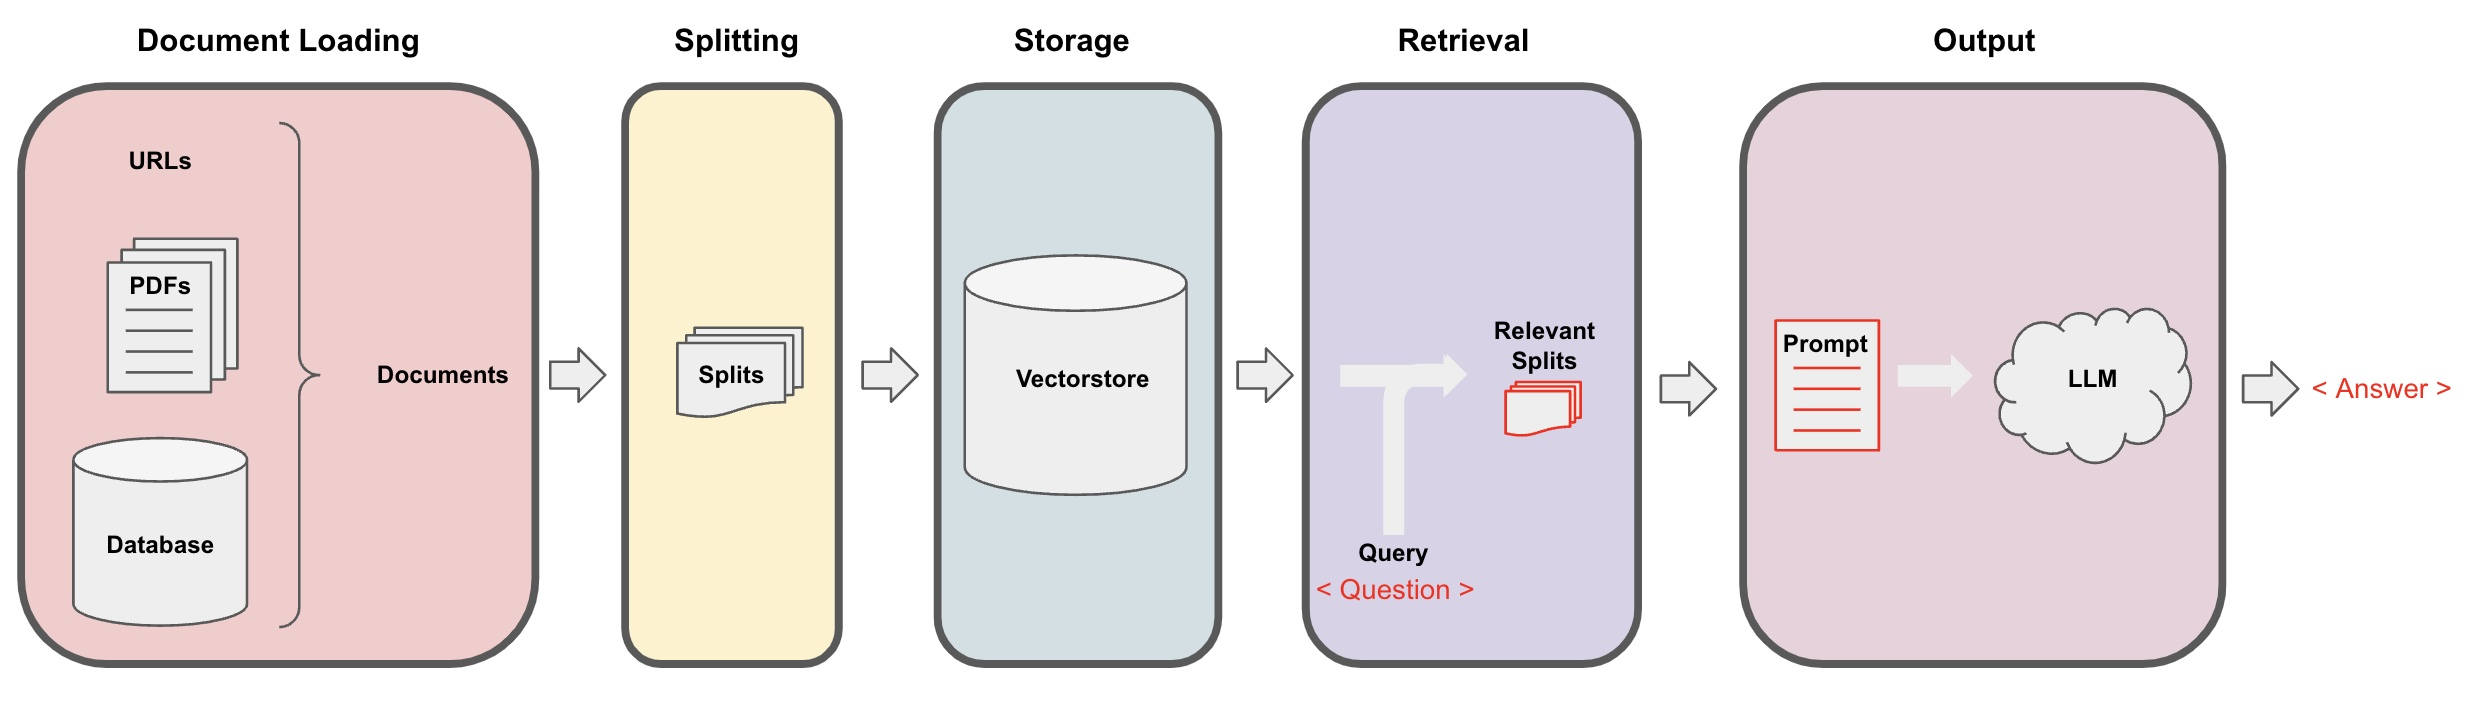

In [1]:
#! pip install langchain

In [2]:
import os
import openai
import sys
import yaml

# change to your token
with open('./token.yaml', 'r') as file:
    keys = yaml.safe_load(file)
    
openai.api_key = keys["openai_key"]

## PDFs

Let's load a PDF [transcript](https://see.stanford.edu/materials/aimlcs229/transcripts/MachineLearning-Lecture01.pdf) from Andrew Ng's famous CS229 course! These documents are the result of automated transcription so words and sentences are sometimes split unexpectedly.

In [3]:
# The course will show the pip installs you would need to install packages on your own machine.
# These packages are already installed on this platform and should not be run again.
# ! pip install pypdf 

In [4]:
from langchain.document_loaders import PyPDFLoader
loader = PyPDFLoader("./docs/cs229_lectures/MachineLearning-Lecture01.pdf") #Andrew Wu機器學習課程的逐字稿
pages = loader.load()

Each page is a `Document`.

A `Document` contains text (`page_content`) and `metadata`.

In [5]:
len(pages)

22

In [6]:
page = pages[0]

In [7]:
print(page.page_content[0:500])

MachineLearning-Lecture01  
Instructor (Andrew Ng):  Okay. Good morning. Welcome to CS229, the machine 
learning class. So what I wanna do today is ju st spend a little time going over the logistics 
of the class, and then we'll start to  talk a bit about machine learning.  
By way of introduction, my name's  Andrew Ng and I'll be instru ctor for this class. And so 
I personally work in machine learning, and I' ve worked on it for about 15 years now, and 
I actually think that machine learning i


In [8]:
page.metadata

{'source': './docs/cs229_lectures/MachineLearning-Lecture01.pdf', 'page': 0}

## YouTube

In [9]:
from langchain.document_loaders.generic import GenericLoader #
from langchain.document_loaders.parsers import OpenAIWhisperParser # video/audio to text
from langchain.document_loaders.blob_loaders.youtube_audio import YoutubeAudioLoader #

In [10]:
# ! pip install yt_dlp
# ! pip install pydub

**Note**: This can take several minutes to complete.

In [11]:
# url="https://www.youtube.com/watch?v=jGwO_UgTS7I"
url = "https://www.youtube.com/watch?v=2mhFcV2DuoU"
save_dir="docs/youtube/"
loader = GenericLoader(
    YoutubeAudioLoader([url],save_dir),
    OpenAIWhisperParser()
)
docs = loader.load()

[youtube] Extracting URL: https://www.youtube.com/watch?v=2mhFcV2DuoU
[youtube] 2mhFcV2DuoU: Downloading webpage
[youtube] 2mhFcV2DuoU: Downloading ios player API JSON
[youtube] 2mhFcV2DuoU: Downloading m3u8 information
[info] 2mhFcV2DuoU: Downloading 1 format(s): 140
[download] docs/youtube//國泰產險衝刺數據發展   優化核保、理賠流程.m4a has already been downloaded
[download] 100% of    3.06MiB
[ExtractAudio] Not converting audio docs/youtube//國泰產險衝刺數據發展   優化核保、理賠流程.m4a; file is already in target format m4a
Transcribing part 1!


In [12]:
docs[0].page_content[0:500]

'就是因為他產險有這麼多 包括財產跟責任 所以他可以跟不同的業業 做很多的結合 那他就會有場景了 場景就需要保險 那這保險當然不一定他馬上知道 可能需要被我們啟發嘛 所以這一波的疫情的保單 其實讓整個業界 保費整個都上來了 國外產險當然不例外 國外產險在 防疫保單的挹注底下 其實我們上半年大概成長了 差不多10%左右 今年就是防疫保單 有讓他有個新的動能 我們在未來幾年 可能會有的是什麼 我們的綠電 離岸風電這些工程 他工程未來轉成什麼 財產險嘛 這些會有一個新的機會 另外就是我們的一些 5加2的產業 這些會有一個新的機會 科技很多是要透過協商理賠 協商理賠很容易就是憑印象 但是未來我們就會比較有這種統計數據 可以讓我們理賠人有個參考 大概是要怎麼樣的條件 比較有可能雙方達成和解 這個是一個面向 另外可以發掘一些 可能有問題的案件 其實產險在金融科技的應用場景 本來就比較多 壽險的標的比較單一 就是人 那產險你可以從人到物 到一個更虛擬的責任 可是事實上未來很多的數位環境 它是到某個行業的數位環境去 那時候你一定要透過 網路投保API的方式串接回來 我們的一些行動投保APP 可以節省一些'

## URLs

In [13]:
from langchain.document_loaders import WebBaseLoader

loader = WebBaseLoader("https://tako-analytics.com/2023-09-28-data-science-embedding-and-vector-database-series-1-what-is-embedding/",
                      encoding="utf-8")

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [14]:
docs = loader.load()

In [15]:
print(docs[0].page_content[:1000])






[Data Science] Embedding和向量資料庫系列-1：Embedding是什麼?




























































 


Tako Analytics







            Home
        



            About
        

















 

 



 









 

Tako Analytics




 




Home
About













 


 

 







Home
Data Modeling
[Data Science] Embedding和向量資料庫系列-1：Embedding是什麼?












By


Tao Huang



Sep 28, 2023

11 min read

[Data Science] Embedding和向量資料庫系列-1：Embedding是什麼?








 





 










 
 






前言2022年底，ChatGPT橫空出世，為整個世界帶來又一次的AI熱潮，短短幾個月間，各式各樣的嘗試與應用隨之出現。Open AI 這次投下的震撼彈，也逼著其他科技巨頭們紛紛跟著出牌，一時間整個AI界百花齊放，不只是LLM (Large Language Model，大型語言模型)的各種花式應用，其他 AIGC (AI Generated Content)的模型與討論也跟著大量出現。隨著大量對LLM的嘗試與體驗後，人們開始日漸理解LLM生成的品質與限制。大家開始思考，如果想將LLM應用在自己的商業情境中，該怎麼實現讓LLM "依照指定或有限範圍中的資料或知識"來回答呢? 於是，向量資料庫就在這樣的背景下迎來崛起，跟著成為熱門的討論話題，就讓我們來看看LLM接上向量資料庫這個"外接的大腦"到底是怎麼一回事吧!本篇文章包含三個段落，主要想帶大家理解向量嵌入的基本概念:Embedding是模型理解世界的方式簡單理解Embedding的概念為什麼需要使用Embedding? 它解決了什麼問題?Vector Embedding 向量嵌入在談語言模型與向量資料庫之前，得先了

## Notion

Follow steps [here](https://python.langchain.com/docs/modules/data_connection/document_loaders/integrations/notion) for an example Notion site such as [this one](https://yolospace.notion.site/Blendle-s-Employee-Handbook-e31bff7da17346ee99f531087d8b133f):

* Duplicate the page into your own Notion space and export as `Markdown / CSV`.
* Unzip it and save it as a folder that contains the markdown file for the Notion page.
 

<!-- ![image.png](https://s172-30-123-100p8888.lab-aws-production.deeplearning.ai/notebooks/01_document_loading/img/image.png) -->
<!-- (./img/image.png) -->

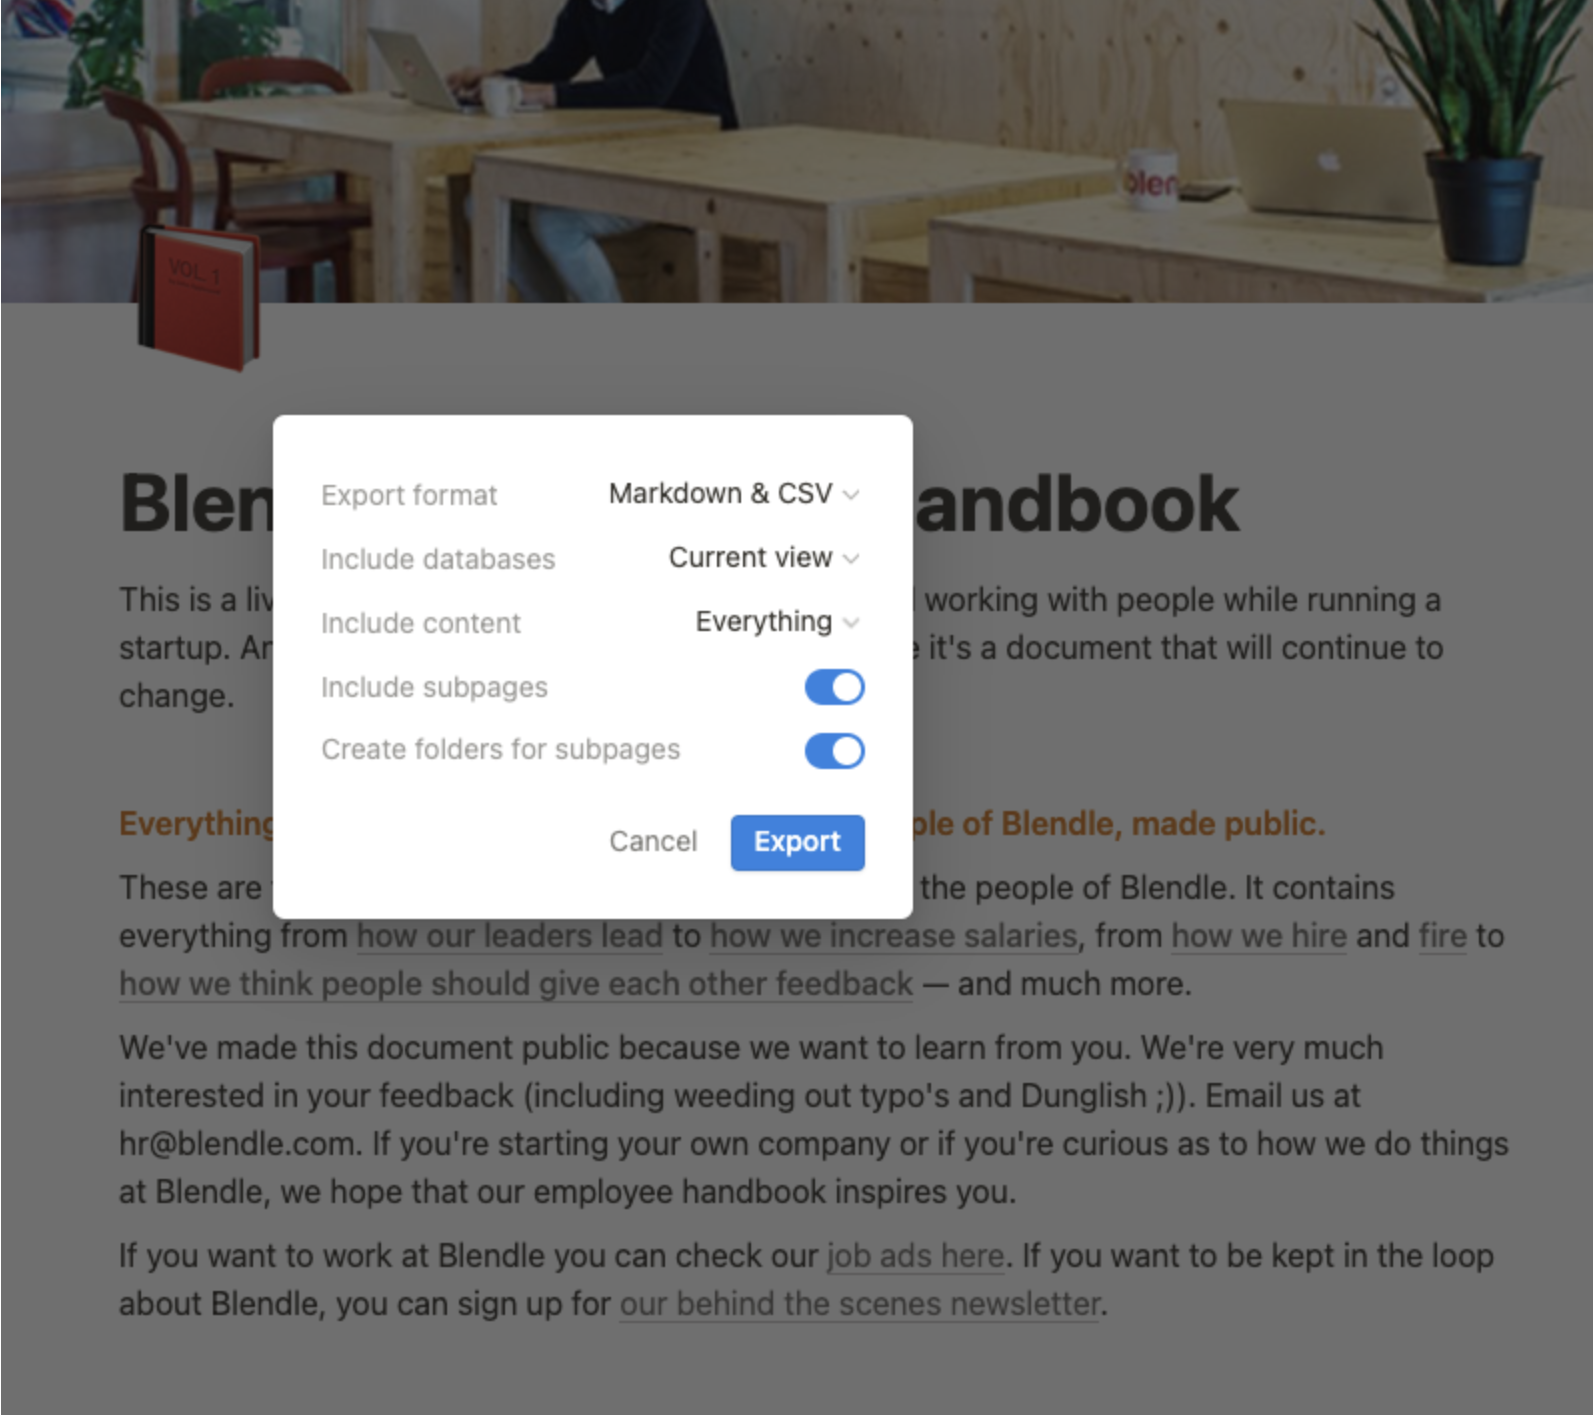

In [16]:
from langchain.document_loaders import NotionDirectoryLoader
loader = NotionDirectoryLoader("docs/Notion_DB")
docs = loader.load()

In [17]:
print(docs[0].page_content[0:200])

# Blendle's Employee Handbook

This is a living document with everything we've learned working with people while running a startup. And, of course, we continue to learn. Therefore it's a document that


In [18]:
docs[0].metadata

{'source': "docs/Notion_DB/Blendle's Employee Handbook f2a7e412e46445228a4952fc7bcd2204.md"}